# Setup Goal and Env

In [15]:
import numpy as np
import random
from typing import Tuple, List


# define Grid size
GRID_SIZE = 3
START = (0,0)
GOAL = (2,2)
OBSTACLE = (1,1)

# define actions

ACTIONS = [
    (1,0),
    (0,1),
    (-1,0),
    (0,-1)
]

In [16]:
def is_valid(state: Tuple[int, int]) -> bool:
  return (0 <= state[0] < GRID_SIZE and
          0 <= state[1] < GRID_SIZE and
          state != OBSTACLE)

In [23]:
# get next state

def get_next_state(state: Tuple[int, int] , action: Tuple[int, int]) -> Tuple[int, int]:
  next_state = (state[0] + action[0], state[1] + action[1])
  return next_state if is_valid(next_state) else state

# Define Q Learning Parameter

In [25]:
EPSILON = 0.3 # Exploration Rate, probablity of choosing random action instead of best. Means choose 30% of random number and choose 70% best known action. EXPLORATION VS EXPLOITATION
ALPHA = 0.3 # Learning rate, HOW QUICK ADAPT NEW INFO
GAMMA = 0.99 # Discount Factor , how much we push the reward, if reward and and it is marked 99% true on what they are doing. Close to one means agent cares long term = short term reward. ENCOURAGEMENT
EPISODES = 10000 # epoches. chnaces to learn

# CREATING AGENT REWARD

In [19]:
def get_reard(state: Tuple[int, int], next_state: Tuple[int, int]) -> int:
  if next_state == GOAL:
    return 100
  elif next_state == OBSTACLE and next_state == state:
    return -10
  else:
    return -1

# CHOOSING ACTIONS, EXPLORATION VS EXPLOITATION

In [20]:
def choose_action(state: Tuple[int, int], q_table: np.array) -> tuple[int, int]:
  if random.uniform(0,1) < EPSILON:
    return random.choice(ACTIONS)

  else:
    return ACTIONS[np.argmax(q_table[state])]


# Q Vlaue Learning from The Bellman Equation

In [21]:
def update_q_table(q_table:np.ndarray, state: Tuple[int, int] , action: Tuple[int, int], reward:int , next_state: Tuple[int, int]) -> None:

  action_idx = ACTIONS.index(action)
  q_table[state][action_idx] += ALPHA * (reward + GAMMA * np.max(q_table[next_state]) - q_table[state][action_idx])

# GAMMA  -> 1 if future reward be valued to immediate values
# GAMMA  -> 0 the agent would only care about the immediate values
# GAMMA  -> 0.99. Balance , both current and immediate values

# Training Script for making Q Table

In [36]:
def train_agent() -> np.ndarray:

  # create an empty table for Q as same size as Input Table Grid
  q_table  = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))

  # start the current state at 0
  for _ in range(EPISODES):
    state = START

    # choose an action to take based on current state and Q Table

    while state != GOAL:

      action = choose_action(state, q_table)

      # Determine next state based on currenr actions chosen

      next_state = get_next_state(state , action)

      # calculate reward based on action

      reward = get_reard(state, next_state)

      # Update the Q Table for the currrent action state pair

      update_q_table(q_table, state, action , reward, next_state)

      # Move to next state
      state = next_state

  return q_table


q_table = train_agent()




In [37]:
q_table

array([[[ 94.0598  ,  94.0598  ,  92.119202,  92.119202],
        [ 94.0598  ,  96.02    ,  94.0598  ,  92.119202],
        [ 98.      ,  96.02    ,  96.02    ,  94.0598  ]],

       [[ 96.02    ,  94.0598  ,  92.119202,  94.0598  ],
        [  0.      ,   0.      ,   0.      ,   0.      ],
        [100.      ,  98.      ,  96.02    ,  98.      ]],

       [[ 96.02    ,  98.      ,  94.0598  ,  96.02    ],
        [ 98.      , 100.      ,  98.      ,  96.02    ],
        [  0.      ,   0.      ,   0.      ,   0.      ]]])

In [38]:
# =========================
# Pretty Q-table printers
# =========================

# Maps your ACTIONS order to symbols (down, right, up, left as you defined)
ACTION_SYMBOLS = {
    (1, 0):  "v",   # down
    (0, 1):  ">",   # right
    (-1, 0): "^",   # up
    (0, -1): "<",   # left
}

def _coord_list(grid_size: int):
    # Header order: (0,0)|(0,1)|(0,2)|(1,0)|... like your screenshot
    coords = []
    for r in range(grid_size):
        for c in range(grid_size):
            coords.append((r, c))
    return coords

def visualize_q_table_detailed(q_table, grid_size, goal, obstacle=None, width=10):
    """
    Prints the 'Detailed Q-table Grid' exactly like the screenshot:
    - header with coordinates across
    - one row per ACTION showing that action's Q-values at every state
    """
    obstacle = set([] if obstacle is None else (obstacle if isinstance(obstacle, (list, set, tuple)) else [obstacle]))
    coords = _coord_list(grid_size)

    # Header
    print("Detailed Q-table Grid:")
    header = "| " + " | ".join(f"({r},{c})".center(width) for (r,c) in coords) + " |"
    line = "-" * len(header)
    print(line)
    print(header)
    print(line)

    # For each action row, print values per state in header order
    for a_idx, a in enumerate(ACTIONS):
        row_cells = []
        for (r, c) in coords:
            pos = (r, c)
            if pos == goal:
                cell = "GOAL".center(width)
            elif pos in obstacle:
                cell = "OBSTACLE".center(width)
            else:
                cell = f"{q_table[r, c, a_idx]:.2f}".rjust(width)
            row_cells.append(cell)
        print(" " + ACTION_SYMBOLS.get(a, "?") + " | " + " | ".join(row_cells) + " |")
        print(line)

def visualize_best_actions_grid(q_table, grid_size, goal, obstacle=None, width=10, with_values=True):
    """
    Prints the 'Best Actions Grid' like the screenshot:
    - 3 (or grid_size) rows
    - each cell shows best action and its value (or just label for GOAL/OBSTACLE)
    """
    obstacle = set([] if obstacle is None else (obstacle if isinstance(obstacle, (list, set, tuple)) else [obstacle]))

    def best_cell(r, c):
        pos = (r, c)
        if pos == goal:
            return "GOAL".center(width)
        if pos in obstacle:
            return "OBSTACLE".center(width)
        idx = int(np.argmax(q_table[r, c]))
        sym = ACTION_SYMBOLS.get(ACTIONS[idx], "?")
        if with_values:
            return f"{sym}: {q_table[r,c,idx]:.2f}".rjust(width)
        return f"{sym}".center(width)

    print("\nBest Actions Grid:")
    for r in range(grid_size):
        row = "| " + " | ".join(best_cell(r, c) for c in range(grid_size)) + " |"
        line = "-" * len(row)
        print(line)
        print(row)
    print(line)


In [39]:
visualize_q_table_detailed(q_table, GRID_SIZE, GOAL, obstacle=OBSTACLE)
visualize_best_actions_grid(q_table, GRID_SIZE, GOAL, obstacle=OBSTACLE, with_values=True)


Detailed Q-table Grid:
----------------------------------------------------------------------------------------------------------------------
|   (0,0)    |   (0,1)    |   (0,2)    |   (1,0)    |   (1,1)    |   (1,2)    |   (2,0)    |   (2,1)    |   (2,2)    |
----------------------------------------------------------------------------------------------------------------------
 v |      94.06 |      94.06 |      98.00 |      96.02 |       0.00 |     100.00 |      96.02 |      98.00 |    GOAL    |
----------------------------------------------------------------------------------------------------------------------
 > |      94.06 |      96.02 |      96.02 |      94.06 |       0.00 |      98.00 |      98.00 |     100.00 |    GOAL    |
----------------------------------------------------------------------------------------------------------------------
 ^ |      92.12 |      94.06 |      96.02 |      92.12 |       0.00 |      96.02 |      94.06 |      98.00 |    GOAL    |
----------------

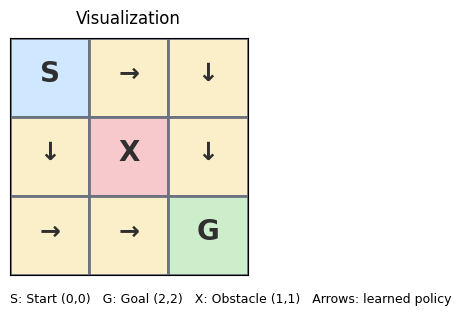

In [40]:
# === Q-learning + Grid Visualization (3x3) ===
import numpy as np, random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# --------- Environment ----------
GRID_SIZE = 3
START = (0,0)
GOAL = (2,2)
OBSTACLE = (1,1)

ACTIONS = [(1,0),(0,1),(-1,0),(0,-1)]  # down, right, up, left
ACTION_SYMBOLS = {(1,0):"↓", (0,1):"→", (-1,0):"↑", (0,-1):"←"}

def is_valid(s):
    return (0 <= s[0] < GRID_SIZE) and (0 <= s[1] < GRID_SIZE) and (s != OBSTACLE)

def get_next_state(s, a):
    ns = (s[0]+a[0], s[1]+a[1])
    return ns if is_valid(ns) else s

# --------- Q-learning ----------
EPSILON = 0.3      # exploration
ALPHA   = 0.3      # learning rate
GAMMA   = 0.99     # discount
EPISODES = 8000
MAX_STEPS = 50

def get_reward(s, ns):
    if ns == GOAL: return 100
    if ns == s and s != GOAL: return -10   # bumping into wall/obstacle
    return -1                               # step cost

def choose_action(s, q):
    if random.random() < EPSILON:
        return random.choice(ACTIONS)
    return ACTIONS[int(np.argmax(q[s]))]

def update_q(q, s, a, r, ns):
    ai = ACTIONS.index(a)
    q[s][ai] += ALPHA * (r + GAMMA * np.max(q[ns]) - q[s][ai])

def train():
    q = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)), dtype=float)
    for _ in range(EPISODES):
        s = START
        for _ in range(MAX_STEPS):
            if s == GOAL: break
            a = choose_action(s, q)
            ns = get_next_state(s, a)
            r = get_reward(s, ns)
            update_q(q, s, a, r, ns)
            s = ns
    return q

# Train (or comment this out if you already have q_table)
q_table = train()

# --------- Visualization ----------
def visualize_policy_grid(q_table, start, goal, obstacle, title="Visualization"):
    fig, ax = plt.subplots(figsize=(4,4))   # single plot, no seaborn

    # Colors
    col_start = "#cfe8ff"   # light blue
    col_goal  = "#cdeecb"   # light green
    col_obst  = "#f7c9cc"   # light red
    col_cell  = "#faefc8"   # light yellow
    col_border = "#6b7280"  # gray border
    col_text   = "#2f2f2f"

    # Draw cells
    for r in range(GRID_SIZE):
        for c in range(GRID_SIZE):
            # flip y so (0,0) appears top-left visually
            xy = (c, GRID_SIZE-1-r)
            pos = (r,c)

            if pos == start:   color = col_start
            elif pos == goal:  color = col_goal
            elif pos == obstacle: color = col_obst
            else:              color = col_cell

            ax.add_patch(Rectangle(xy, 1, 1, facecolor=color, edgecolor=col_border, linewidth=2))

            # Centered label
            cx, cy = xy[0] + 0.5, xy[1] + 0.55
            if pos == start:
                ax.text(cx, cy, "S", ha="center", va="center", fontsize=20, weight="bold", color=col_text)
            elif pos == goal:
                ax.text(cx, cy, "G", ha="center", va="center", fontsize=20, weight="bold", color=col_text)
            elif pos == obstacle:
                ax.text(cx, cy, "X", ha="center", va="center", fontsize=20, weight="bold", color=col_text)
            else:
                best_idx = int(np.argmax(q_table[r,c]))
                a = ACTIONS[best_idx]
                sym = ACTION_SYMBOLS[a]
                ax.text(cx, cy, sym, ha="center", va="center", fontsize=18, weight="bold", color=col_text)

    ax.set_xlim(0, GRID_SIZE)
    ax.set_ylim(0, GRID_SIZE)
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_aspect("equal")
    ax.set_title(title, pad=10)

    # Optional mini legend
    y0 = -0.35
    ax.text(0, y0, "S: Start (0,0)   G: Goal (2,2)   X: Obstacle (1,1)   Arrows: learned policy", fontsize=9)
    plt.tight_layout()
    plt.show()

# Render
visualize_policy_grid(q_table, START, GOAL, OBSTACLE)
